In [48]:
import sys
import os
#sys.path.append('/home/anna/annaCode/UiO/MEK4420/Oblig2_work')
#from oblig2 import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

In [49]:
def parse_matlab_output(file_path):
    num_lines = sum(1 for line in open(file_path))

    x_m = np.empty(num_lines)
    y_m = np.empty(num_lines)
    x_p = np.empty(num_lines)
    y_p = np.empty(num_lines)
    
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            data = line.split()
            x_m[i] = float(data[0])  
            y_m[i] = float(data[1])  
            x_p[i] = float(data[2])  
            y_p[i] = float(data[3])  
    return x_m, y_m, x_p, y_p, num_lines

In [50]:
def diffraction(file_path):
    nu = 1.5
    

    x_m, y_m, x_p, y_p,  nn_total_segments = parse_matlab_output(file_path)
    #sgement_inddex =np.linspace(1,nn_total_segments,nn_total_segments)
    
    dx_array=x_p - x_m
    dy_array=y_p - y_m   
    
    #.^2 element wise squaring in matlab
    ds = ((dx_array)**2+(dy_array)**2)**(1/2)
    # bx and by are midpoints
    bx = 0.5*(x_m + x_p)
    by = 0.5*(y_m + y_p)
    n1 = -(y_p - y_m)/ds
    n2 = (x_p - x_m)/ds
    
    phi0 = np.exp(nu*(by- complex(0, 1) * bx))
     
    gg = np.zeros([nn_total_segments,nn_total_segments], dtype=complex)
    ss = np.zeros([nn_total_segments,nn_total_segments], dtype=complex)
   
    for i in range(0,nn_total_segments):
        for j in range(0, nn_total_segments):
            xa = bx[j] - bx[i]
            yb = by[j] + by[i]
            zz = nu*(yb-complex(0,1)*xa)
            # expint exponential integral function
            f1 = -2*np.exp(zz)*(scipy.special.exp1(zz)+np.log(zz)-np.log(-zz))
            f2 = 2*np.pi*np.exp(zz)
            g2 = np.real(f1)+complex(0,1)*np.real(f2)
            #lhs
            arg0 = np.imag(np.log((x_m[j]-bx[i]+complex(0,1)*(y_m[j]- by[i]))/(x_p[j]-bx[i]+complex(0,1)*(y_p[j]-by[i]))))
            if j-i == 0:
                arg0=-np.pi
            arg1 = np.imag(np.log((x_m[j]-bx[i]+complex(0,1)*(y_m[j]+by[i]))/(x_p[j]-bx[i]+complex(0,1)*(y_p[j]+by[i]))))
            help1 = (n1[j]* (np.imag(f1)+complex(0,1)*np.imag(f2)) +n2[j]* (np.real(f1)+complex(0,1)*np.real(f2)))*nu*ds[j]
            ss[i,j]=(arg0+arg1+help1)
            
    
    rhsD = - 2. * np.pi * phi0
    phi_diffraction = np.linalg.solve(ss, rhsD)

    return phi_diffraction, nn_total_segments


In [15]:
file_path = '/home/anna/MATLAB/R2023b/bin/box.dat'
#KD = 1.2 since D is 1 then K is 1
k = 1.7
L_D_string = "L:D 1:2"
K_D_string = f"KD ={k}" 
phi_diffraction =  diffraction(file_path)

file_path = '/home/anna/MATLAB/R2023b/bin/box10_20.dat'
#KD = 1.2 since D is 1 then K is 1
k = 1.5
L_D_string = "L:D 1:2"
K_D_string = f"KD ={k}" 
phi_diffraction =  diffraction(file_path)
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

x_m, y_m, x_p, y_p,  nn_total_segments = parse_matlab_output(file_path)
segment_index =np.linspace(1,nn_total_segments,nn_total_segments)
ax.plot(segment_index, np.imag(phi_diffraction), color = 'red', alpha = 0.5,label= "Im(Φ_R)")
ax.plot(segment_index, np.real(phi_diffraction), color = 'navy',label = "Re(Φ_R)")

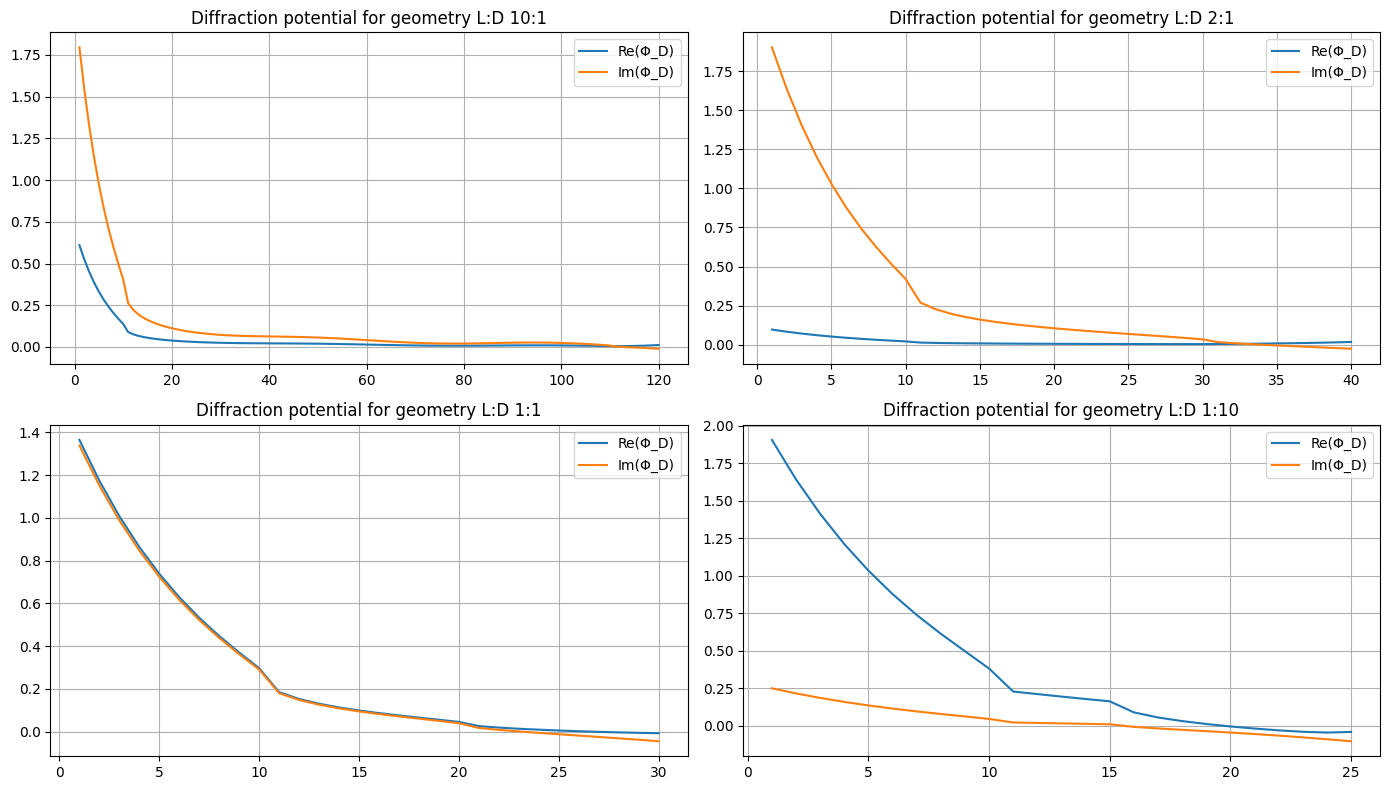

In [52]:
file_list = ['box10_1.dat','box2_1.dat','box1_1.dat', 'box1_10.dat']
aspect_ratio_strings = ['L:D 10:1', 'L:D 2:1', 'L:D 1:1', 'L:D 1:10']

data_dir_path = '/home/anna/annaCode/UiO/MEK4420/Oblig2_work/'

fig, axs = plt.subplots(2, 2, figsize=(14, 8), tight_layout=True)

for i, geometry_data in enumerate(file_list):
    phi_diffraction, nn_total_segments =  diffraction(os.path.join(data_dir_path, geometry_data))
    segment_index =np.linspace(1,nn_total_segments,nn_total_segments)
    
    axs[i//2, i%2].plot(segment_index, np.real(phi_diffraction), label = "Re(Φ_D)")
    axs[i//2, i%2].plot(segment_index, np.imag(phi_diffraction), label = "Im(Φ_D)")
    axs[i//2, i%2].set_title('Diffraction potential for geometry ' + aspect_ratio_strings[i])
    axs[i//2, i%2].grid(True)
    axs[i//2, i%2].legend()


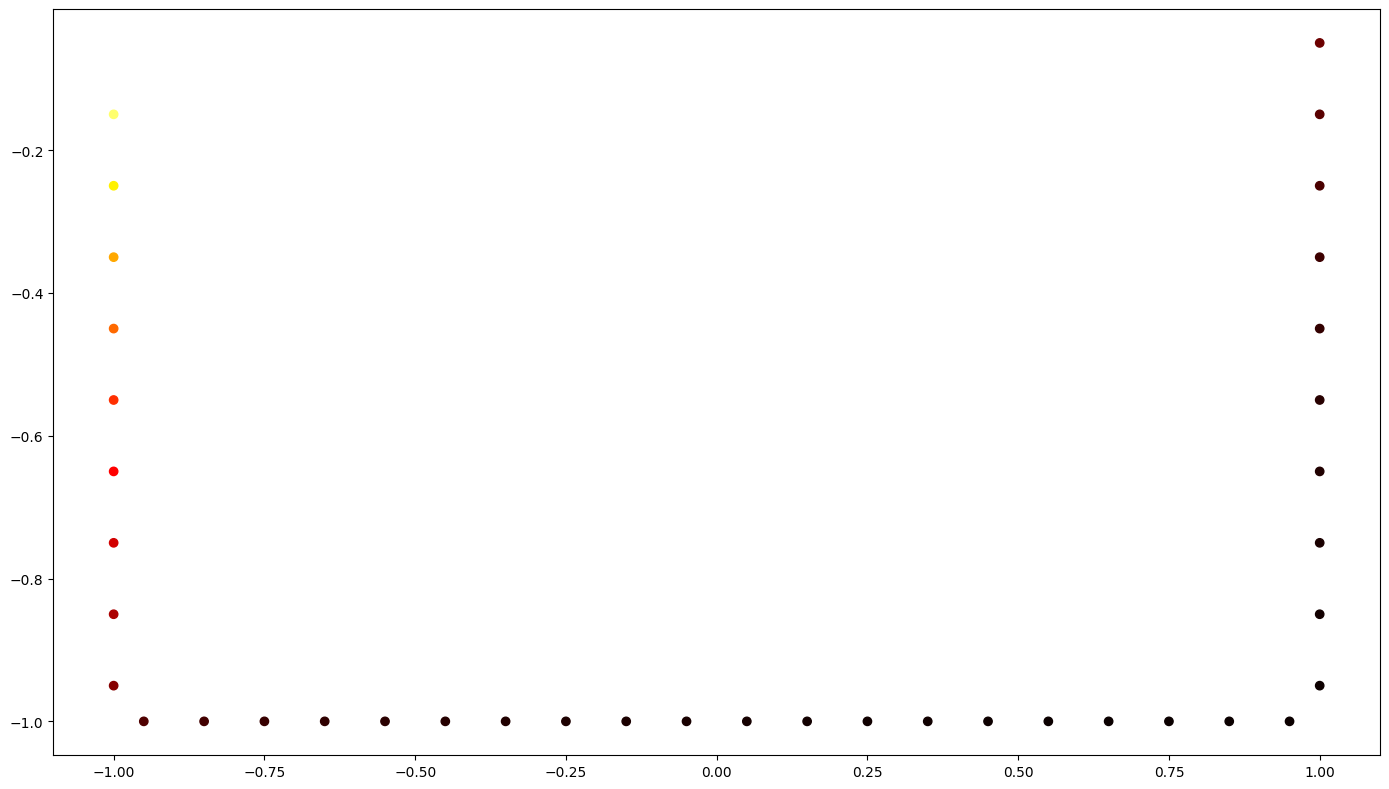

In [43]:
file_path = '/home/anna/MATLAB/R2023b/bin/box.dat'
#KD = 1.2 since D is 1 then K is 1
k = 1.7
L_D_string = "L:D 1:2"
K_D_string = f"KD ={k}" 
phi_diffraction =  diffraction(file_path)

file_path = '/home/anna/MATLAB/R2023b/bin/box10_20.dat'
#KD = 1.2 since D is 1 then K is 1
k = 1.5
L_D_string = "L:D 1:2"
K_D_string = f"KD ={k}" 
phi_diffraction, nn_total_segments =  diffraction(file_path)
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

x_m, y_m, x_p, y_p,  nn_total_segments = parse_matlab_output(file_path)
mid_x = 0.5*(x_m + x_p)
mid_y = 0.5*(y_m + y_p)

sc =ax.scatter(mid_x, mid_y, c = np.real(phi_diffraction) , cmap='hot')
segment_index =np.linspace(1,nn_total_segments,nn_total_segments)
#ax.plot(segment_index, np.imag(phi_diffraction), color = 'red', alpha = 0.5,label= "Im(Φ_R)")
#ax.plot(segment_index, np.real(phi_diffraction), color = 'navy',label = "Re(Φ_R)")

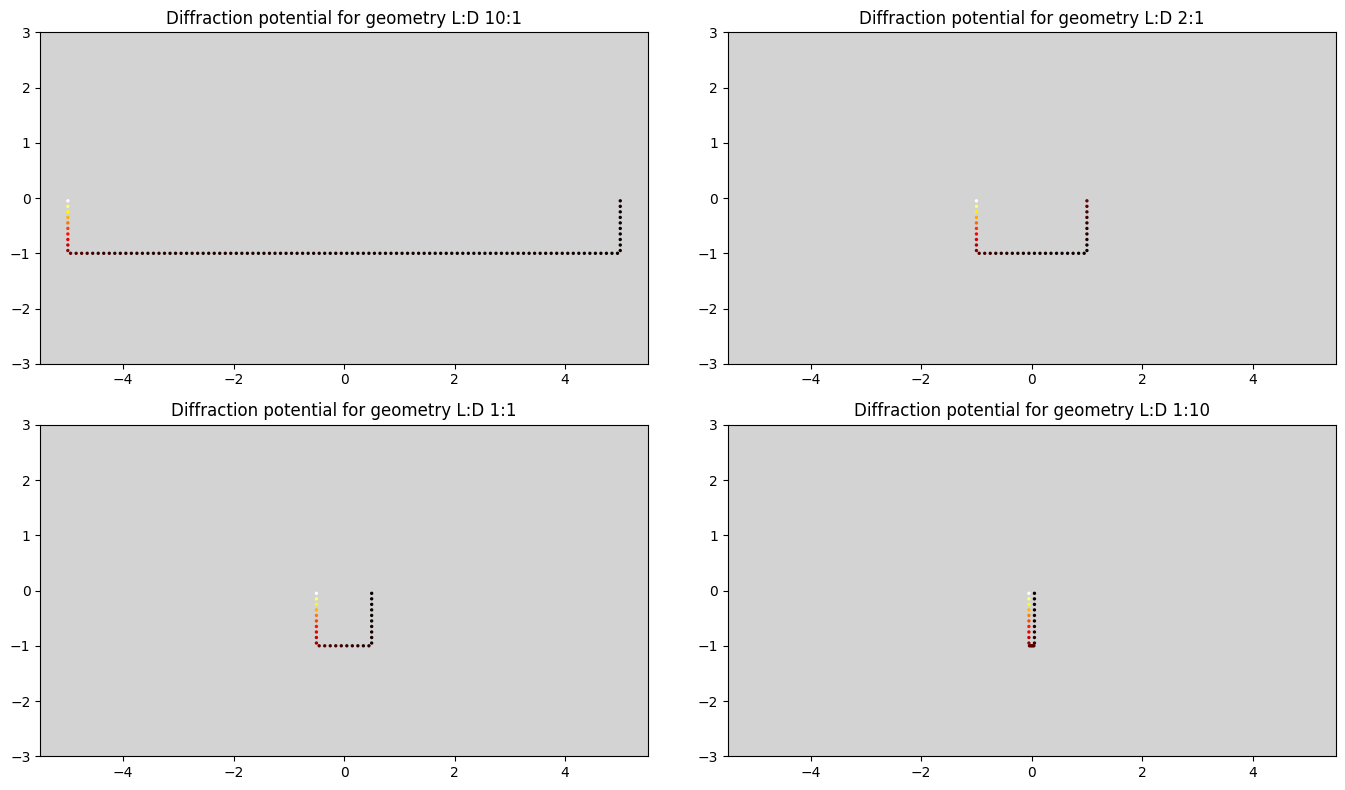

In [53]:
file_list = ['box10_1.dat','box2_1.dat','box1_1.dat', 'box1_10.dat']
aspect_ratio_strings = ['L:D 10:1', 'L:D 2:1', 'L:D 1:1', 'L:D 1:10']

data_dir_path = '/home/anna/annaCode/UiO/MEK4420/Oblig2_work/'

fig, axs = plt.subplots(2, 2, figsize=(14, 8), tight_layout=True)

for i, geometry_data in enumerate(file_list):

    file_path = os.path.join(data_dir_path, geometry_data)
    x_m, y_m, x_p, y_p,  nn_total_segments = parse_matlab_output(file_path)
    phi_diffraction, _ =  diffraction(file_path)
    segment_index =np.linspace(1,nn_total_segments,nn_total_segments)
    mid_x = 0.5*(x_m + x_p)
    mid_y = 0.5*(y_m + y_p)

    x_lim_min = -5.5
    x_lim_max = 5.5
    axs[i//2, i%2].set_xlim(x_lim_min, x_lim_max)
    y_lim_min = -3
    y_lim_max = 3
    axs[i//2, i%2].set_ylim(y_lim_min, y_lim_max)
    axs[i//2, i%2].set_aspect('equal')
    
    
    axs[i//2, i%2].set_title('Diffraction potential for geometry ' + aspect_ratio_strings[i])
    
    axs[i//2, i%2].set_facecolor('lightgrey')
    sc =axs[i//2, i%2].scatter(mid_x, mid_y, c = np.real(phi_diffraction), s=2, cmap='hot')
    #c_bar = fig.colorbar(sc)
    #c_bar.set_label('color map/ diffraction potential ')
    #axs[i//2, i%2].set_title('Re(Φ_R) at boundary midpoints' +  K_D_string + ' ' +  L_D_string )
    norm1 = sc.norm

    '''
    axs[i//2, i%2].set_facecolor('lightgrey')
    sc2 =axs[i//2, i%2].scatter(mid_x, mid_y, c= np.imag(phi_diffraction), s = 10, cmap=sc.get_cmap(), norm=norm1)
    c_bar2 = fig.colorbar(sc2)
    c_bar2.set_label('color map/ radiation potential ')
    axs[i//2, i%2].set_title('Im(Φ_R) at boundary midpoints' +  L_D_string )
     '''